# Traditional Methods vs CNN for Text Classification

Objective: Implement traditional text classification approaches (TF and TF-IDF with Naive Bayes) and compare them to deep learning approaches (CNN with learnable embeddings and CNN with pre-trained GloVe embeddings) on the AG News dataset. 

The goal is to measure how model complexity and embedding quality affect classification performance.

## 1. Library Imports

This section checks for all required libraries by importing them.

In [3]:
# Checking for all libraries that don't come pre-installed with Python or Anaconda.

try:
    import tensorflow
except ImportError:
    !pip install tensorflow

# Additional file to download:
# 'glove.6B.100d.txt' from https://huggingface.co/arjahojnik/BiLSTM-sentiment-model/blob/main/glove.6B.100d.txt

In [4]:
# All libraries utilised in the code
# Running them all together to check that there are no import issues or incompatabilities

# Importing dataset
import pandas as pd

# For TF and TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## 2. Data Preprocessing and Cleaning

The AG News dataset is loaded from the provided train.csv and test.csv files. The target labels are encoded numerically, and each article's title and description are concatenated to form a single input sequence.

In [6]:
# Importing training and testing datasets
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Data pre-processing

# Label encoding the target 'Class Index' variable
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_data['Class Index'])
test_y = encoder.transform(test_data['Class Index'])

# Combining the Title and Description as the text input for each instance
train_x = train_data['Title'] + ' ' + train_data['Description']
test_x = test_data['Title'] + ' ' + test_data['Description']

# Storing the test accuracies for each model to make a final comparison graph
test_accuracies = []

## 3. TF + Naive Bayes Classifier

The training and test data are transformed to term frequencies, and a Naive Bayes classifier is trained on the TF features.

Training and test set accuracy are computed and printed to evalute performance.

In [8]:
# Building a text classifier using Term Frequency (TF) and a classic learning algorithm

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Creating a CountVectorizer object to transform text to word frequencies
count_vector = CountVectorizer()

# Transform both the training and test to TFs using the count vectorizer object
tf_train_x = count_vector.fit_transform(train_x) # Fitting to just training data
tf_test_x = count_vector.transform(test_x)

# Chose Naive Bayes as classic learning algorithm
from sklearn import naive_bayes, metrics

# Fitting classifier to just the training data set
tf_classifier = naive_bayes.MultinomialNB()
tf_classifier.fit(tf_train_x, train_y)

# Report accuracy for both training and test datasets
tf_train_preds = tf_classifier.predict(tf_train_x)
tf_train_acc = metrics.accuracy_score(tf_train_preds, train_y)
print("Naives Bayes with TF: \n")
print("Training Accuracy:", tf_train_acc)

tf_test_preds = tf_classifier.predict(tf_test_x)
tf_test_acc = metrics.accuracy_score(tf_test_preds, test_y)
print("Test Accuracy:", tf_test_acc)

test_accuracies.append(tf_test_acc)

Naives Bayes with TF: 

Training Accuracy: 0.917275
Test Accuracy: 0.900921052631579


## 4. TF-IDF + Naive Bayes Classifier

The training and test data are transformed to TF-IDF representation, which is then used to train a Naive Bayes classifier.

Training and test set accuracy are computed and printed to evalute performance.

In [10]:
# Building another classifier using TF-IDF

tfidf_vector = TfidfVectorizer()
tfidf_train_x = tfidf_vector.fit_transform(train_x)
tfidf_test_x = tfidf_vector.transform(test_x)

# Fitting Naives Bayes classifier to just the training data set
tfidf_classifier = naive_bayes.MultinomialNB()
tfidf_classifier.fit(tfidf_train_x, train_y)

# Report accuracy for both training and test datasets
tfidf_train_preds = tfidf_classifier.predict(tfidf_train_x)
tfidf_train_acc = metrics.accuracy_score(tfidf_train_preds, train_y)
print("Step 2 (Naives Bayes with TF-IDF): \n")
print("Training Accuracy:", tfidf_train_acc)

tfidf_test_preds = tf_classifier.predict(tfidf_test_x)
tfidf_test_acc = metrics.accuracy_score(tfidf_test_preds, test_y)
print("Test Accuracy:", tfidf_test_acc)

test_accuracies.append(tfidf_test_acc)

Step 2 (Naives Bayes with TF-IDF): 

Training Accuracy: 0.9170416666666666
Test Accuracy: 0.905


## 5. CNN with Randomised Embeddings

A convolutional neural network (CNN) is trained on the AG News dataset using randomly initialised, trainable embedding layer.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 70, 100)        │     7,033,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 66, 128)        │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,106,444 (27.11 MB)

 Trainable params: 7,106,444 (27.11 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - acc: 0.7915 - loss: 0.5810 - val_acc: 0.9097 - val_loss: 0.2619
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - acc: 0.9322 - loss: 0.2220 - val_acc: 0.9112 - val_loss: 0.2509
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - acc: 0.9555 - loss: 0.1445 - val_acc: 0.9100 - val_loss: 0.2646
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - acc: 0.9715 - loss: 0.0927 - val_acc: 0.9055 - val_loss: 0.3044
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - acc: 0.9816 - loss: 0.0605 - val_acc: 0.9026 - val_loss: 0.3441
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - acc: 0.9887 - loss: 0.0383 - val_acc: 0.8983 - val_loss: 0.3913
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - acc: 0.9922 - loss: 0.0273 - val_acc: 0.8969 - val_loss: 0.4432
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - acc: 0.9941 - loss: 0.0218 - val_acc: 0.8969 - val_loss: 0.4812
Epoch 9/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/

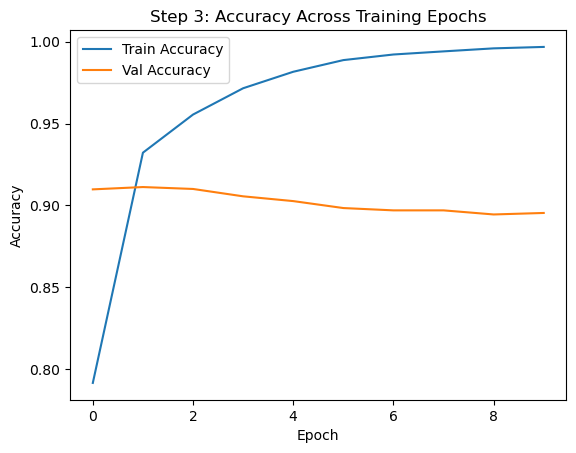

In [12]:
# Building a classifier using a CNN with randomised, trainable embedding layer

# Converting words to integer IDs
from sklearn import model_selection, preprocessing, metrics

import tensorflow
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Creating a tokeniser
token = text.Tokenizer()
token.fit_on_texts(train_x)
word_index = token.word_index

# Converting text to token sequences, and padding them to be the same length vectors
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
test_seq_x = sequence.pad_sequences(token.texts_to_sequences(test_x), maxlen=70)

vocab_size = len(word_index)+1
maxlen = 70
embed_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)) # weights not set, so randomised
model.build((None, maxlen)) # builds the first layer with the specific input_length
model.add(layers.Conv1D(filters=128, kernel_size=5, activation='relu'))

# Chose MaxPooling over AveragePooling because it focuses on the key features, while taking the average can dilute their impact
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5)) # to address training data overfitting
model.add(layers.Dense(4, activation='softmax')) # there are 4 classes

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # for multi-class classification
              metrics=['acc'])

history = model.fit(train_seq_x,
                    train_y,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.1, # setting aside 10% of training data for validation set
                    verbose=1)

# Evaluating on test set: test_results includes loss and accuracy
test_results = model.evaluate(test_seq_x, test_y)
print("Test Accuracy and Loss:")
print(test_results)

# Plot a figure showing accuracy changes for training and test data
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.title('Step 3: Accuracy Across Training Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_accuracies.append(test_results[1]) # appending CNN's test accuracy

## Note on Validation Accuracy:

Validating accuracy starts around 91% and stagnates or slightly decreases after several epochs. This likely indicates early convergence or minor overfitting in later epochs.

## 6. CNN with fixed, pre-trained GloVe embeddings

A pre-trained GloVe embedding is loaded to create an embedding matrix. This matrix is then set as the fixed (non-trainable) embedding dimension for the CNN. The same CNN architecture as before is used, which allows comparison with the trainable embedding variant to assess the effect of pre-trained embeddings. 

The training result is a plot of the training and validation accuracy per epoch, and the evaluation result is the final test accuracy with a confusion matrix.

In [15]:
# Creating a new CNN using pre-trained word embeddings.

# Extracting GloVe pre-trained embeddings and generating embedding matrix

import numpy as np
np.random.seed(42) # added for consistency

glove_file = 'glove.6B.100d.txt'

# Generating an embedding matrix from the provided pre-trained word embedding file
def generate_embedding_matrix(file, word_index, embedding_dim):
  vocab_size = len(word_index) + 1
  embedding_matrix = np.zeros((vocab_size, embedding_dim))

  with open(file) as f:
    for line in f:
      word, *vector = line.split()
      if word in word_index:
        i = word_index[word]
        embedding_matrix[i] = np.array(vector, dtype=np.float32)[:embedding_dim]

  return embedding_matrix

# Creating embedding matrix
embedding_matrix = generate_embedding_matrix(glove_file, word_index, embedding_dim=100) # word_index = token.word_index from previous cell

In [16]:
# Creating a new CNN using pre-trained word embeddings.

np.random.seed(42) # added for consistency

# Using the same train_seq_x, test_seq_x variables created earlier

glove_model = Sequential()
# Adding the pre-trained GloVe embeddings as weights, freezing them so they aren't trainable
glove_model.add(layers.Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], trainable=False))
glove_model.build((None, maxlen)) # builds the first layer with the specific input_length

glove_model.add(layers.Conv1D(filters=128, kernel_size=5, activation='relu'))

glove_model.add(layers.GlobalMaxPooling1D())
glove_model.add(layers.Dense(64, activation='relu'))
glove_model.add(layers.Dropout(0.5))
glove_model.add(layers.Dense(4, activation='softmax')) # there are 4 classes

glove_model.summary()

glove_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # for multi-class classification
              metrics=['acc'])

gm_history = glove_model.fit(train_seq_x,
                    train_y,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.1, # setting aside 10% of training data for validation set
                    verbose=1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 70, 100)        │     7,033,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 66, 128)        │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,106,444 (27.11 MB)

 Trainable params: 72,644 (283.77 KB)

 Non-trainable params: 7,033,800 (26.83 MB)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - acc: 0.8343 - loss: 0.4816 - val_acc: 0.8993 - val_loss: 0.2741
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - acc: 0.8967 - loss: 0.3228 - val_acc: 0.9086 - val_loss: 0.2532
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - acc: 0.9076 - loss: 0.2873 - val_acc: 0.9091 - val_loss: 0.2486
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - acc: 0.9152 - loss: 0.2592 - val_acc: 0.9139 - val_loss: 0.2346
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - acc: 0.9213 - loss: 0.2364 - val_acc: 0.9156 - val_loss: 0.2353
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - acc: 0.9266 - loss: 0.2167 - val_acc: 0.9134 - val_loss: 0.2439
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - acc: 0.9330 - loss: 0.1944 - val_acc: 0.9103 - val_loss: 0.2502
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - acc: 0.9371 - loss: 0.1798 - val_acc: 0.9146 - val_loss: 0.2592
Epoch 9/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/

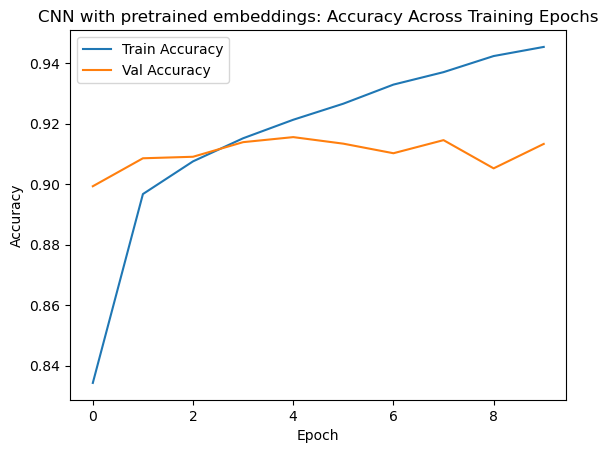

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step


Test Accuracy: 0.9134210526315789
Test Data Confusion Matrix:


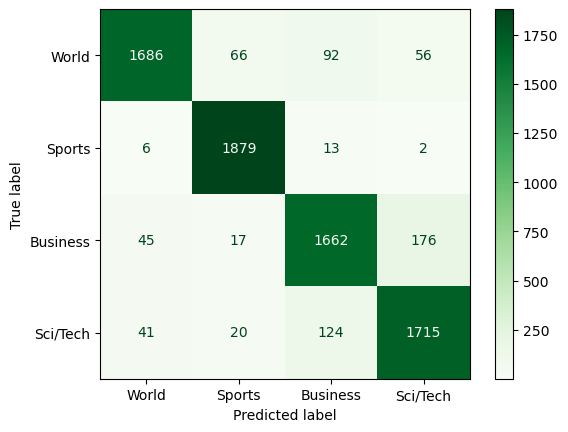

In [17]:
# Training and test results for CNN with pre-trained GloVe embeddings

# Creating a graph showing accuracy changes across training
plt.plot(gm_history.history['acc'], label='Train Accuracy')
plt.plot(gm_history.history['val_acc'], label='Val Accuracy')
plt.title('CNN with pretrained embeddings: Accuracy Across Training Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Predicting on the test set
test_pred_probs = glove_model.predict(test_seq_x) # output is probabilities
test_pred = np.argmax(test_pred_probs, axis=1) # converting the probabilities to the class indices 0-3
# Calculating accuracy
pred_acc = accuracy_score(test_y, test_pred)
print("\n\nTest Accuracy:", pred_acc)
test_accuracies.append(pred_acc)

# Generating Confusion Matrix
class_labels = ['World', 'Sports', 'Business', 'Sci/Tech']
cm = confusion_matrix(test_y, test_pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
cm_disp.plot(cmap=plt.cm.Greens)
print("Test Data Confusion Matrix:")
plt.show()

## 7. Comparing Model Performance

This plot summarises the final test accuracy achieved by each model to provide a direct comparison of model performance.

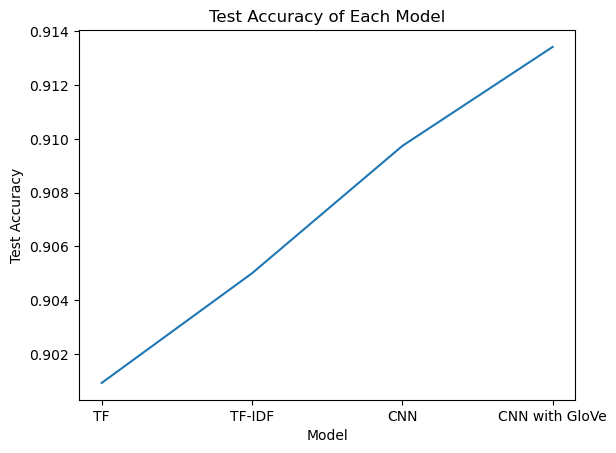

In [19]:
# Create a figure that reports the test accuracy for each model

plt.plot(test_accuracies)
plt.title('Test Accuracy of Each Model')
plt.xticks([0,1,2,3], ['TF', 'TF-IDF', 'CNN', 'CNN with GloVe'])
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.show()

## Final Evaluation: 

The results show a clear progression in test accuracy as model complexity increases. Traditional feature-based models (TF and TF-IDF with Naive Bayes) achieve solid performance on this dataset, but the CNN variants still perform noticeably better. The CNN with fixed pre-trained GloVe embeddings achieves the highest accuracy, demonstrating that combining a deep architecture with high-quality semantic embeddings provides a noticeable advantage over both traditional models and a CNN trained with randomly initialised embeddings.